# 1. Import Libraries
In this step, we import the necessary tools for data analysis and visualization:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Loading the Dataset
* We load the training and testing data.
* We removed the **'Id'** column from both datasets.
* Displaying the **shape**.

In [3]:
train_df = pd.read_csv('C:\\Users\\m\\Desktop\\House-Prices-Project\\Data\\train.csv')
test_df = pd.read_csv('C:\\Users\\m\\Desktop\\House-Prices-Project\\Data\\test.csv')

train_df.drop(columns=['Id'], inplace=True)
test_df.drop(columns=['Id'], inplace=True)

print(f'train_df shape: {train_df.shape}')
print(f'test_df shape: {test_df.shape}')


train_df shape: (1460, 80)
test_df shape: (1459, 79)


# 3. Numerical Exploration & Outliers
* **Numerical Features**: Identifying quantitative columns.
* **Outlier Handling**: Detecting and removing extreme values to improve data quality.

In [4]:
num_cols = train_df.select_dtypes(include=[np.number]).columns
num_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

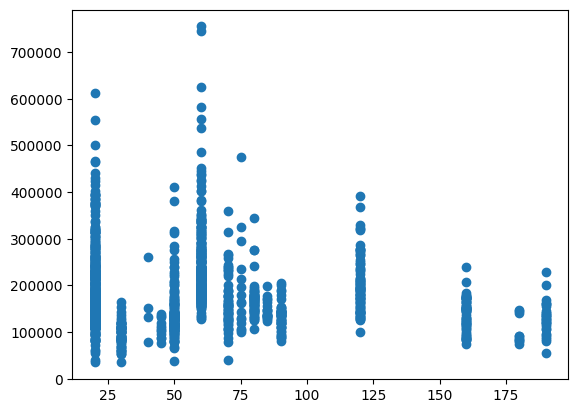

In [5]:
plt.scatter(x='MSSubClass', y='SalePrice', data=train_df)
train_df['MSSubClass'] = train_df['MSSubClass'].astype(str)
test_df['MSSubClass'] = test_df['MSSubClass'].astype(str)

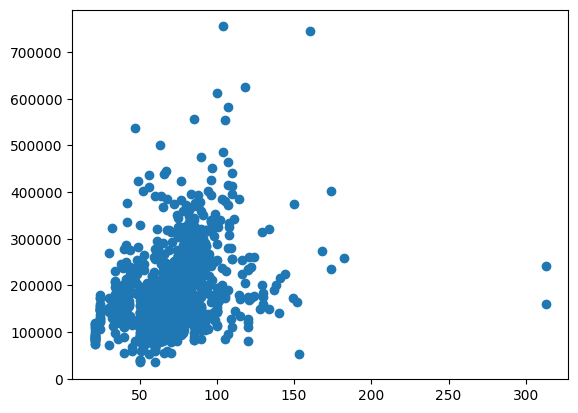

In [6]:
plt.scatter(x='LotFrontage', y='SalePrice', data=train_df)

In [7]:
train_df.query('LotFrontage > 300')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
934,20,RL,313.0,27650,Pave,NaN,IR2,HLS,AllPub,Inside,...,0,NaN,NaN,NaN,0,11,2008,WD,Normal,242000
1298,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [8]:
train_df = train_df.drop([934,1298])

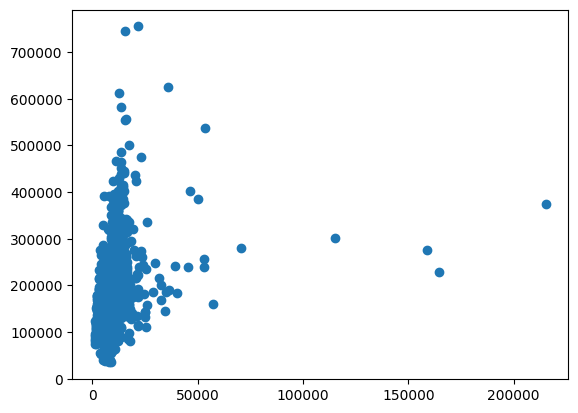

In [9]:
plt.scatter(x='LotArea', y='SalePrice', data=train_df)

In [10]:
train_df.query('LotArea > 100000')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
249,50,RL,NaN,159000,Pave,NaN,IR2,Low,AllPub,CulDSac,...,0,NaN,NaN,Shed,500,6,2007,WD,Normal,277000
313,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000
335,190,RL,NaN,164660,Grvl,NaN,IR1,HLS,AllPub,Corner,...,0,NaN,NaN,Shed,700,8,2008,WD,Normal,228950
706,20,RL,NaN,115149,Pave,NaN,IR2,Low,AllPub,CulDSac,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,302000


In [11]:
train_df = train_df.drop([249,313,335,706])

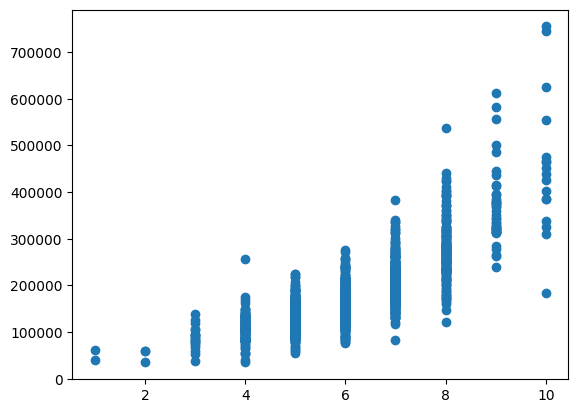

In [12]:
plt.scatter(x='OverallQual', y='SalePrice', data=train_df)

In [13]:
train_df.query('OverallQual == 10 and SalePrice < 200000')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [14]:
train_df = train_df.drop(523)

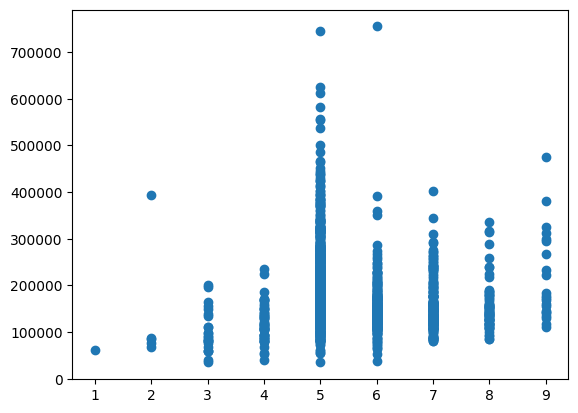

In [15]:
plt.scatter(x='OverallCond', y='SalePrice', data=train_df)

In [16]:
train_df.query('OverallCond == 2 and SalePrice > 200000')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
378,20,RL,88.0,11394,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,6,2010,New,Partial,394432


In [17]:
train_df.query('OverallCond == 6 and SalePrice > 700000')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000


In [18]:
train_df = train_df.drop([378,691])

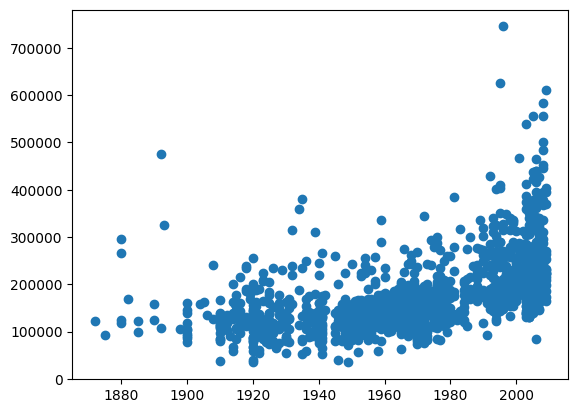

In [19]:
plt.scatter(x='YearBuilt', y='SalePrice', data=train_df)

In [20]:
train_df.query('YearBuilt < 1900 & SalePrice > 400000')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
185,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,Inside,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000


In [21]:
train_df = train_df.drop(185)

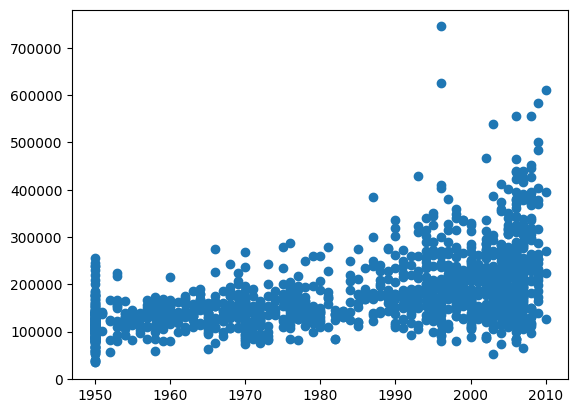

In [22]:
plt.scatter(x='YearRemodAdd', y='SalePrice', data=train_df)

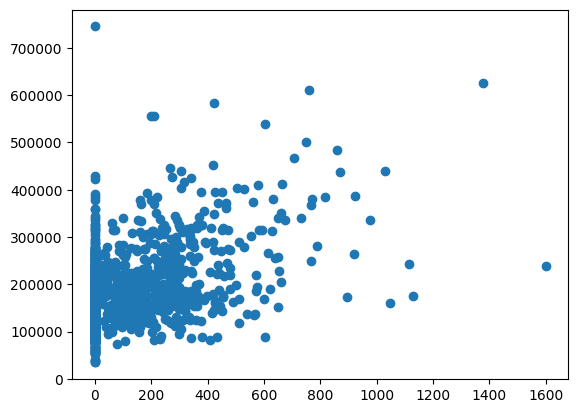

In [23]:
plt.scatter(x='MasVnrArea', y='SalePrice', data=train_df)

In [24]:
train_df.query('MasVnrArea > 1500')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
297,60,FV,66.0,7399,Pave,Pave,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,239000


In [25]:
train_df = train_df.drop(297)

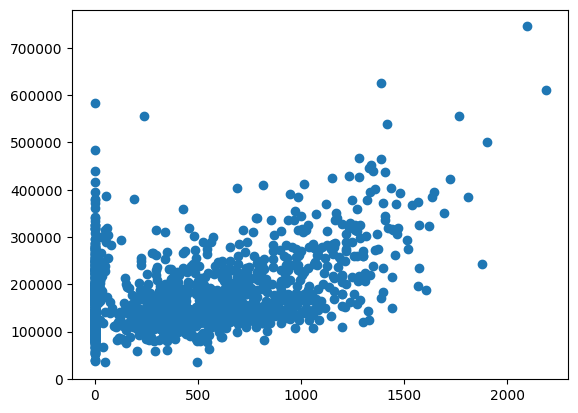

In [26]:
plt.scatter(x='BsmtFinSF1', y='SalePrice', data=train_df)

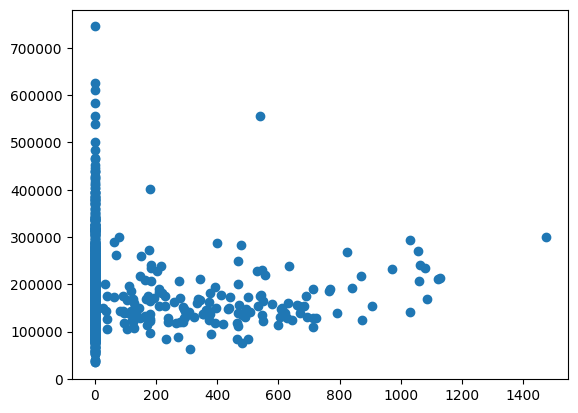

In [27]:
plt.scatter(x='BsmtFinSF2', y='SalePrice', data=train_df)

In [28]:
train_df.query('BsmtFinSF2 > 400 & SalePrice > 500000')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
440,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000


In [29]:
train_df = train_df.drop(440)

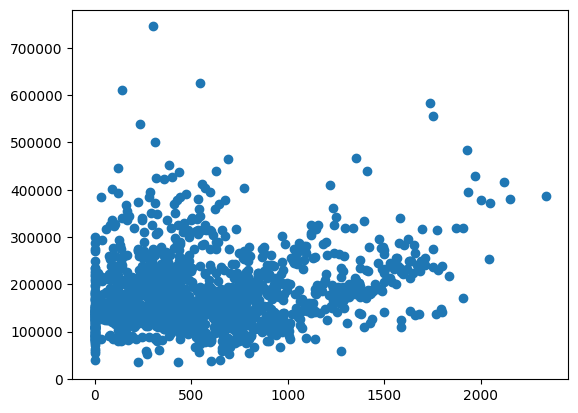

In [30]:
plt.scatter(x='BsmtUnfSF', y='SalePrice', data=train_df)

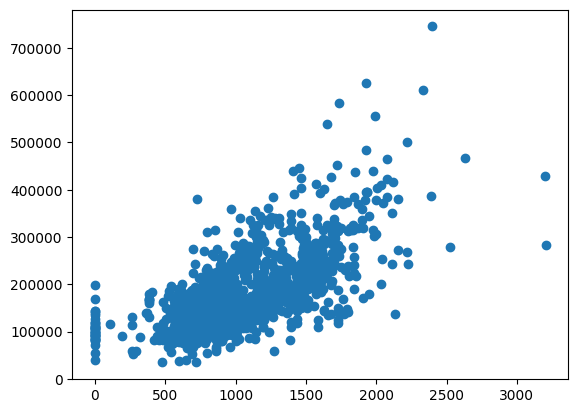

In [31]:
plt.scatter(x='TotalBsmtSF', y='SalePrice', data=train_df)

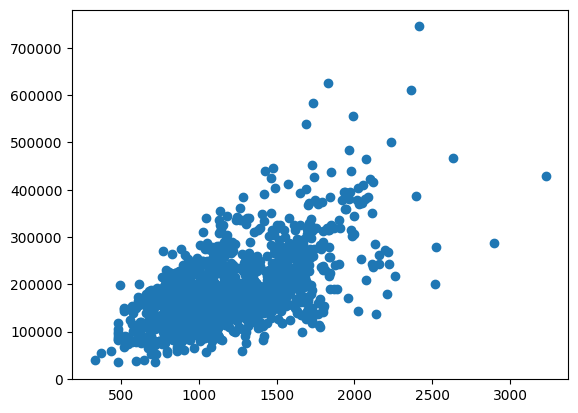

In [32]:
plt.scatter(x='1stFlrSF', y='SalePrice', data=train_df)

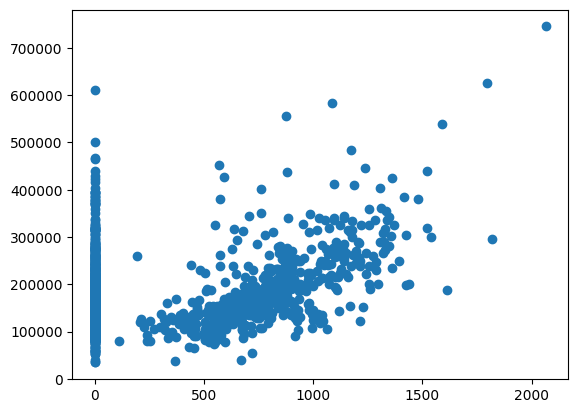

In [33]:
plt.scatter(x='2ndFlrSF', y='SalePrice', data=train_df)

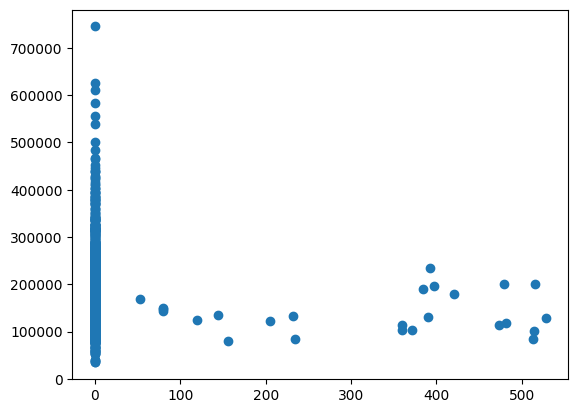

In [34]:
plt.scatter(x='LowQualFinSF', y='SalePrice', data=train_df)

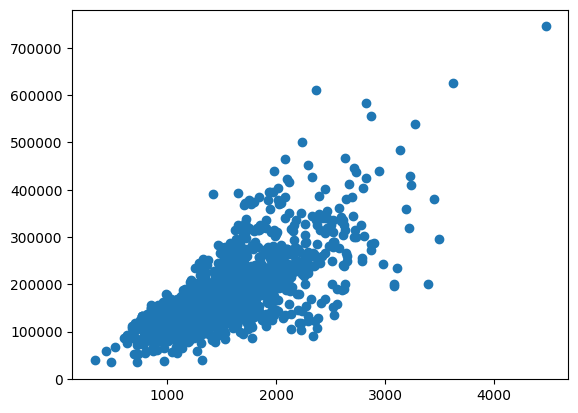

In [35]:
plt.scatter(x='GrLivArea', y='SalePrice', data=train_df)

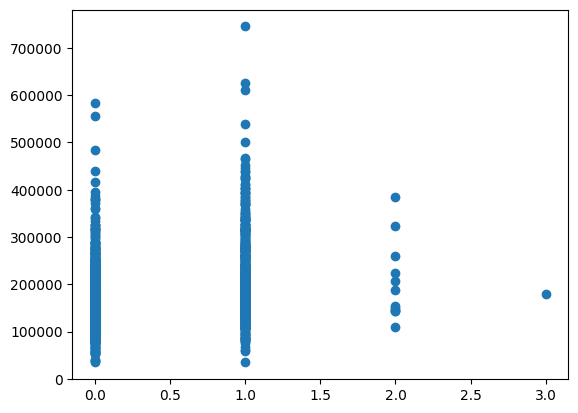

In [36]:
plt.scatter(x='BsmtFullBath', y='SalePrice', data=train_df)

In [37]:
train_df.query('BsmtFullBath == 3')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
738,90,RL,60.0,10800,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,3,2009,WD,Alloca,179000


In [38]:
train_df = train_df.drop(738)

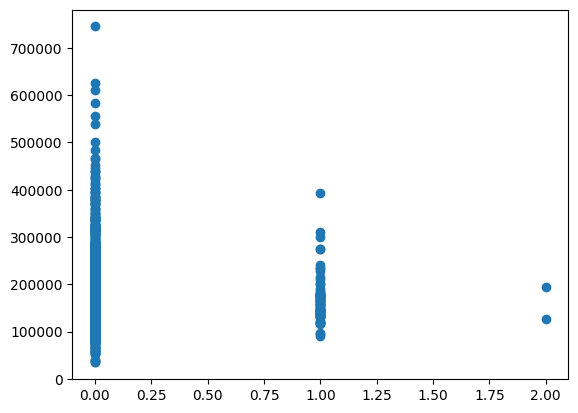

In [39]:
plt.scatter(x='BsmtHalfBath', y='SalePrice', data=train_df)

In [40]:
train_df.query('BsmtHalfBath == 2')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
597,120,RL,53.0,3922,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2007,New,Partial,194201
954,90,RL,35.0,9400,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,NaN,NaN,0,10,2006,WD,AdjLand,127500


In [41]:
train_df = train_df.drop([597,954])

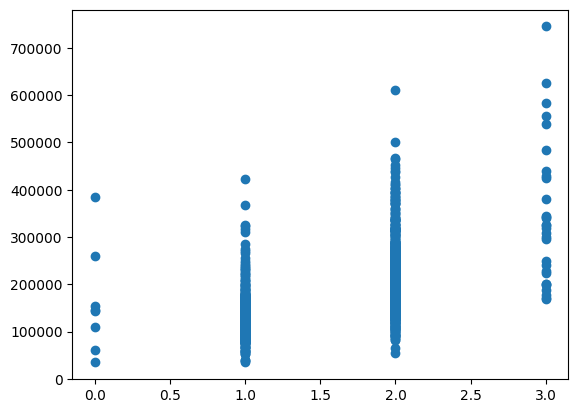

In [42]:
plt.scatter(x='FullBath', y='SalePrice', data=train_df)

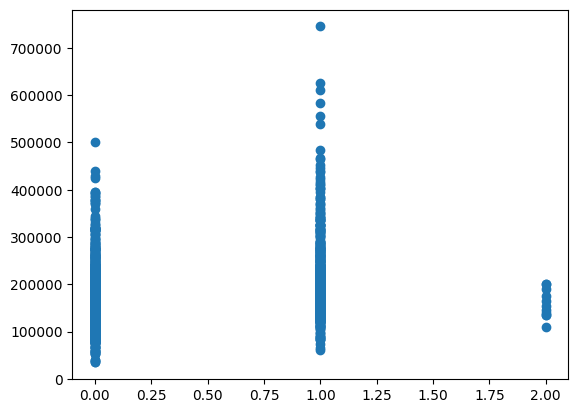

In [43]:
plt.scatter(x='HalfBath', y='SalePrice', data=train_df)

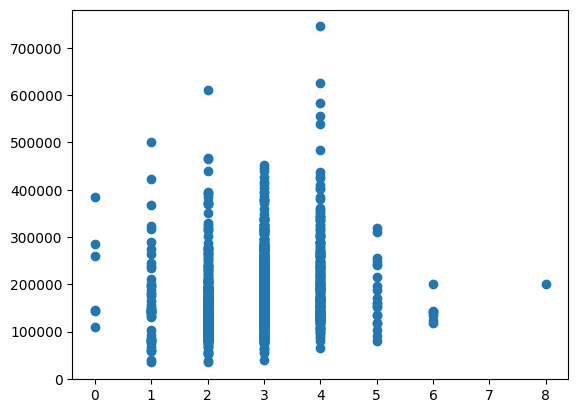

In [44]:
plt.scatter(x='BedroomAbvGr', y='SalePrice', data=train_df)

In [45]:
train_df.query('BedroomAbvGr == 8')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
635,190,RH,60.0,10896,Pave,Pave,Reg,Bnk,AllPub,Inside,...,0,NaN,NaN,NaN,0,3,2007,WD,Abnorml,200000


In [46]:
train_df = train_df.drop(635)

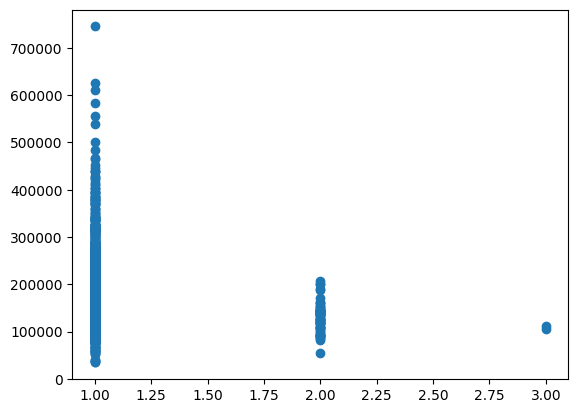

In [47]:
plt.scatter(x='KitchenAbvGr', y='SalePrice', data=train_df)

In [48]:
train_df.query('KitchenAbvGr == 3')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
48,190,RM,33.0,4456,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2009,New,Partial,113000
809,75,RM,90.0,8100,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,MnPrv,NaN,0,11,2009,WD,Normal,106000


In [49]:
train_df = train_df.drop([48,809])

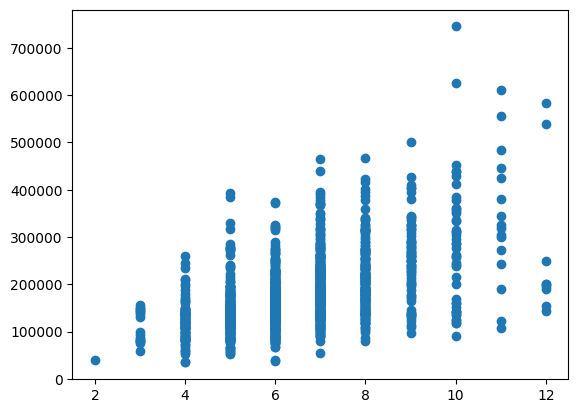

In [50]:
plt.scatter(x='TotRmsAbvGrd', y='SalePrice', data=train_df)

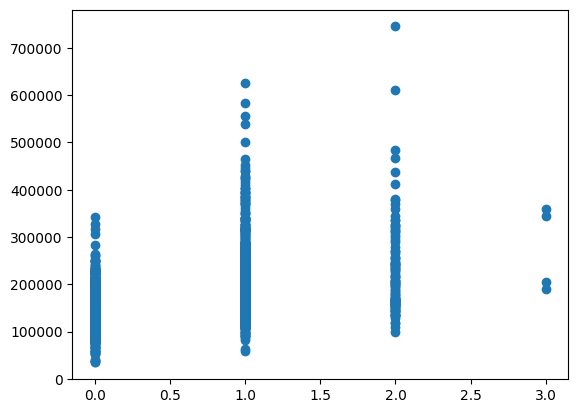

In [51]:
plt.scatter(x='Fireplaces', y='SalePrice', data=train_df)

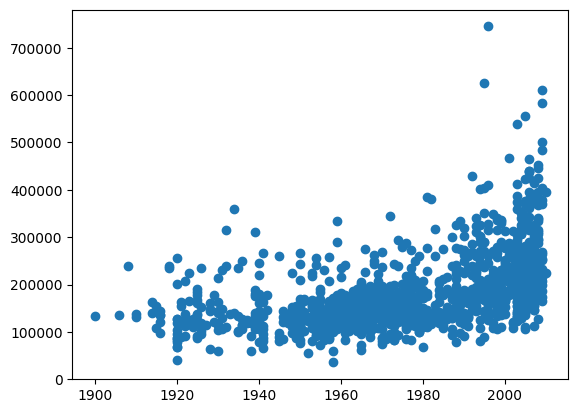

In [52]:
plt.scatter(x='GarageYrBlt', y='SalePrice', data=train_df)

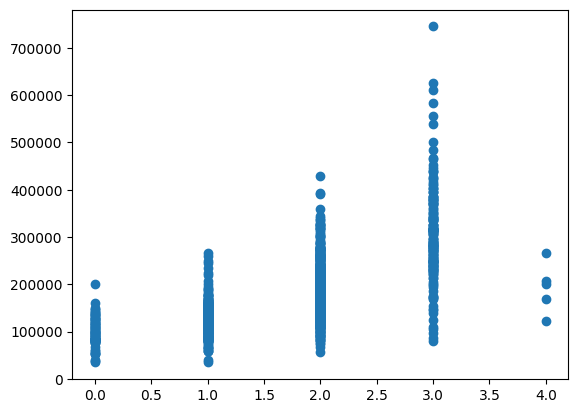

In [53]:
plt.scatter(x='GarageCars', y='SalePrice', data=train_df)

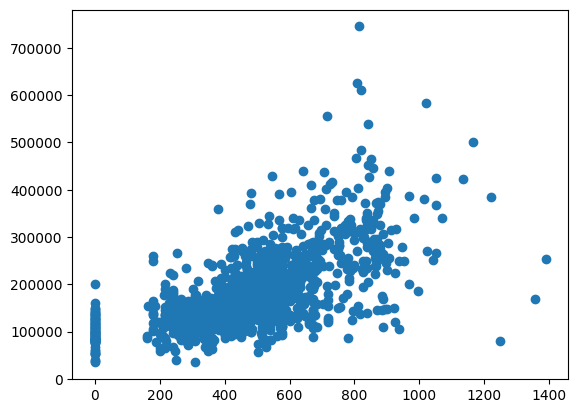

In [54]:
plt.scatter(x='GarageArea', y='SalePrice', data=train_df)

In [55]:
train_df.query('GarageArea > 1200 and SalePrice < 200000')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1061,30,C (all),120.0,18000,Grvl,NaN,Reg,Low,AllPub,Inside,...,0,NaN,NaN,Shed,560,8,2008,ConLD,Normal,81000
1190,190,RL,NaN,32463,Pave,NaN,Reg,Low,AllPub,Inside,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,168000


In [56]:
train_df = train_df.drop([1061,1190])

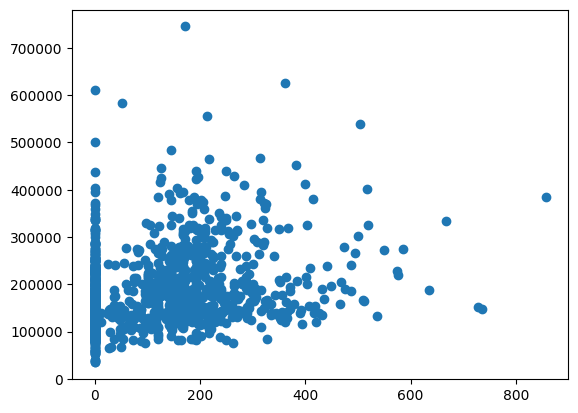

In [57]:
plt.scatter(x='WoodDeckSF', y='SalePrice', data=train_df)

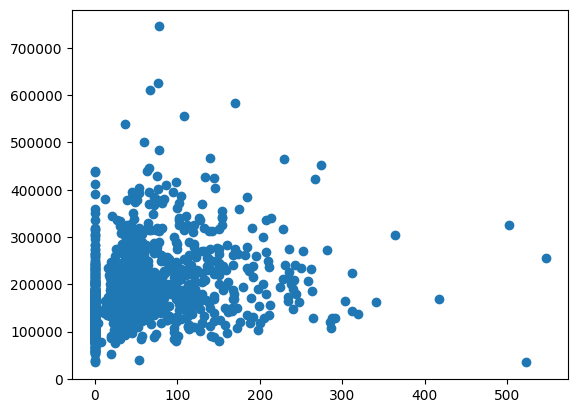

In [58]:
plt.scatter(x='OpenPorchSF', y='SalePrice', data=train_df)

In [59]:
train_df.query('OpenPorchSF > 500 and SalePrice < 100000')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
495,30,C (all),60.0,7879,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdWo,NaN,0,11,2009,WD,Abnorml,34900


In [60]:
train_df = train_df.drop(495)

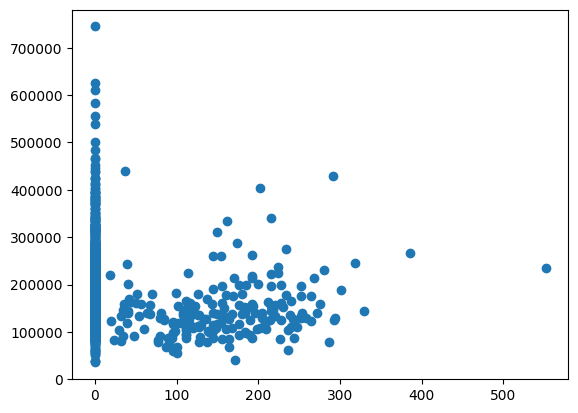

In [61]:
plt.scatter(x='EnclosedPorch', y='SalePrice', data=train_df)

In [62]:
train_df.query('EnclosedPorch > 500')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
197,75,RL,174.0,25419,Pave,NaN,Reg,Lvl,AllPub,Corner,...,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000


In [63]:
train_df = train_df.drop(197)

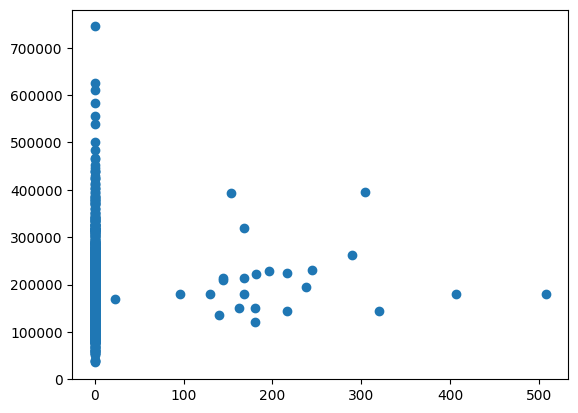

In [64]:
plt.scatter(x='3SsnPorch', y='SalePrice', data=train_df)

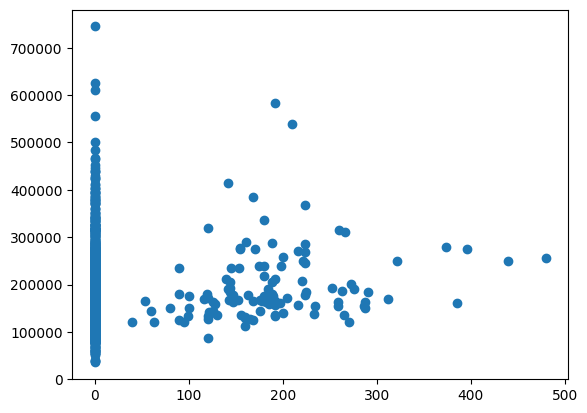

In [65]:
plt.scatter(x='ScreenPorch', y='SalePrice', data=train_df)

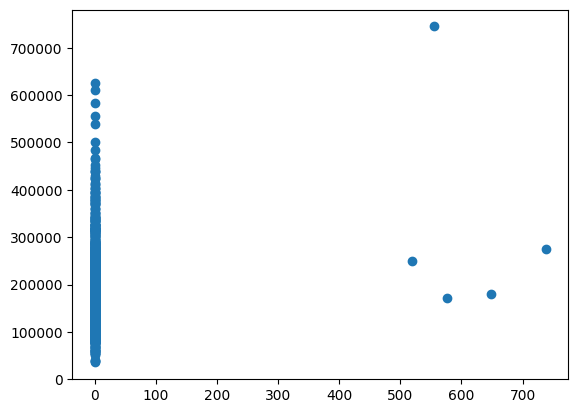

In [66]:
plt.scatter(x='PoolArea', y='SalePrice', data=train_df)

# 4. Handling Missing Values

In [67]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum() / len(train_df) * 100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data.head(20))

              Total    Percent
PoolQC         1433  99.652295
MiscFeature    1387  96.453408
Alley          1349  93.810848
Fence          1161  80.737135
MasVnrType      861  59.874826
FireplaceQu     683  47.496523
LotFrontage     255  17.732962
GarageQual       76   5.285118
GarageType       76   5.285118
GarageFinish     76   5.285118
GarageCond       76   5.285118
GarageYrBlt      76   5.285118
BsmtExposure     38   2.642559
BsmtFinType2     38   2.642559
BsmtQual         37   2.573018
BsmtFinType1     37   2.573018
BsmtCond         37   2.573018
MasVnrArea        8   0.556328
Electrical        1   0.069541
BldgType          0   0.000000


In [68]:
none_cols = [
    'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 
    'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 
    'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
    'BsmtFinType1', 'BsmtFinType2'
]

zero_cols = ['GarageYrBlt', 'GarageArea', 'GarageCars', 'MasVnrArea']

for col in none_cols:
    train_df[col] = train_df[col].fillna('None')
    test_df[col] = test_df[col].fillna('None')

for col in zero_cols:
    train_df[col] = train_df[col].fillna(0)
    test_df[col] = test_df[col].fillna(0)

neighborhood_medians = train_df.groupby('Neighborhood')['LotFrontage'].median()
train_df['LotFrontage'] = train_df['LotFrontage'].fillna(train_df['Neighborhood'].map(neighborhood_medians))
test_df['LotFrontage'] = test_df['LotFrontage'].fillna(test_df['Neighborhood'].map(neighborhood_medians))

train_df['Electrical'] = train_df['Electrical'].fillna(train_df['Electrical'].mode()[0])
test_df['Electrical'] = test_df['Electrical'].fillna(test_df['Electrical'].mode()[0])

In [69]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum() / len(train_df) * 100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data.head(20))

              Total  Percent
MSSubClass        0      0.0
MSZoning          0      0.0
LotFrontage       0      0.0
LotArea           0      0.0
Street            0      0.0
Alley             0      0.0
LotShape          0      0.0
LandContour       0      0.0
Utilities         0      0.0
LotConfig         0      0.0
LandSlope         0      0.0
Neighborhood      0      0.0
Condition1        0      0.0
Condition2        0      0.0
BldgType          0      0.0
HouseStyle        0      0.0
OverallQual       0      0.0
OverallCond       0      0.0
YearBuilt         0      0.0
YearRemodAdd      0      0.0


# 5. Feature Engineering and Drop Some Features

In [70]:
print(f'train_df shape: {train_df.shape}')
print(f'test_df shape: {test_df.shape}')

train_df shape: (1438, 80)
test_df shape: (1459, 79)


In [71]:
# Calculate total area including the basement
train_df['TotalSF'] = train_df['TotalBsmtSF'] + train_df['1stFlrSF'] + train_df['2ndFlrSF']
test_df['TotalSF'] = test_df['TotalBsmtSF'] + test_df['1stFlrSF'] + test_df['2ndFlrSF']

# Calculate only the finished (ready to use) area
train_df['Total_sqr_footage'] = (
    train_df['BsmtFinSF1'] + 
    train_df['BsmtFinSF2'] + 
    train_df['1stFlrSF'] + 
    train_df['2ndFlrSF']
)
test_df['Total_sqr_footage'] = (
    test_df['BsmtFinSF1'] +
    test_df['BsmtFinSF2'] +
    test_df['1stFlrSF'] +
    test_df['2ndFlrSF']
)

# Create a total bathrooms feature
# HalfBath is calculated as 0.5
train_df['TotalBathrooms'] = (train_df['FullBath'] + (0.5 * train_df['HalfBath']) +
                              train_df['BsmtFullBath'] + (0.5 * train_df['BsmtHalfBath']))

test_df['TotalBathrooms'] = (test_df['FullBath'] + (0.5 * test_df['HalfBath']) +
                             test_df['BsmtFullBath'] + (0.5 * test_df['BsmtHalfBath']))

# Calculate the age of the house at the time of sale
train_df['HouseAge'] = train_df['YrSold'].astype(int) - train_df['YearBuilt']
test_df['HouseAge'] = test_df['YrSold'].astype(int) - test_df['YearBuilt']

# Years since last remodel
train_df['YearsSinceRemodel'] = train_df['YrSold'].astype(int) - train_df['YearRemodAdd']
test_df['YearsSinceRemodel'] = test_df['YrSold'].astype(int) - test_df['YearRemodAdd']

# Sum of all porch areas
train_df['TotalPorchSF'] = (train_df['OpenPorchSF'] + train_df['EnclosedPorch'] + 
                            train_df['3SsnPorch'] + train_df['ScreenPorch'] + 
                            train_df['WoodDeckSF'])
test_df['TotalPorchSF'] = (test_df['OpenPorchSF'] + test_df['EnclosedPorch'] + 
                           test_df['3SsnPorch'] + test_df['ScreenPorch'] + 
                           test_df['WoodDeckSF'])

# Check if house has specific features (1 if exists, 0 otherwise)
train_df['HasPool'] = train_df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
train_df['Has2ndFloor'] = train_df['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
train_df['HasGarage'] = train_df['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
train_df['HasBasement'] = train_df['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
test_df['HasPool'] = test_df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
test_df['Has2ndFloor'] = test_df['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
test_df['HasGarage'] = test_df['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
test_df['HasBasement'] = test_df['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)

In [72]:
# List of features used to create combined/new features
features_to_drop = [
    # Area related
    'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 
    'BsmtFinSF1', 'BsmtFinSF2', 
    
    # Bathroom related
    'FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath',
    
    # Time related
    'YearBuilt', 'YearRemodAdd', 'MoSold','YrSold',"GarageYrBlt",
    
    # Porch related
    'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'WoodDeckSF',
    
    # Features converted to binary (Has/No)
    'PoolArea', 'GarageArea'
]
train_df.drop(columns=features_to_drop, inplace=True)
test_df.drop(columns=features_to_drop, inplace=True)

In [73]:
one_value = [
    col for col in train_df.columns
    if train_df[col].value_counts(normalize=True).iloc[0] > 0.99
]
one_value

['Street', 'Utilities', 'Condition2', 'PoolQC', 'HasPool']

In [74]:
for col in one_value:
    print(f"--- Analysis for Column: {col} ---")
    
    counts = train_df[col].value_counts(dropna=False)
    
    percentages = train_df[col].value_counts(dropna=False,normalize=True) * 100
    
    summary_table = pd.DataFrame({
        'Count': counts,
        'Percentage (%)': percentages.map('{:.2f}%'.format)
    })
    
    print(summary_table)
    print("-" * 35)

--- Analysis for Column: Street ---
        Count Percentage (%)
Street                      
Pave     1434         99.72%
Grvl        4          0.28%
-----------------------------------
--- Analysis for Column: Utilities ---
           Count Percentage (%)
Utilities                      
AllPub      1437         99.93%
NoSeWa         1          0.07%
-----------------------------------
--- Analysis for Column: Condition2 ---
            Count Percentage (%)
Condition2                      
Norm         1424         99.03%
Feedr           6          0.42%
Artery          2          0.14%
RRNn            2          0.14%
PosA            1          0.07%
PosN            1          0.07%
RRAn            1          0.07%
RRAe            1          0.07%
-----------------------------------
--- Analysis for Column: PoolQC ---
        Count Percentage (%)
PoolQC                      
None     1433         99.65%
Fa          2          0.14%
Gd          2          0.14%
Ex          1         

In [75]:
train_df.drop(columns=['Street', 'Utilities','PoolQC'], inplace=True)
test_df.drop(columns=['Street', 'Utilities','PoolQC'], inplace=True)


In [76]:
print(f'train_df shape: {train_df.shape}')
print(f'test_df shape: {test_df.shape}')

train_df shape: (1438, 66)
test_df shape: (1459, 65)


# 6. Correlation Analysis

<Axes: >

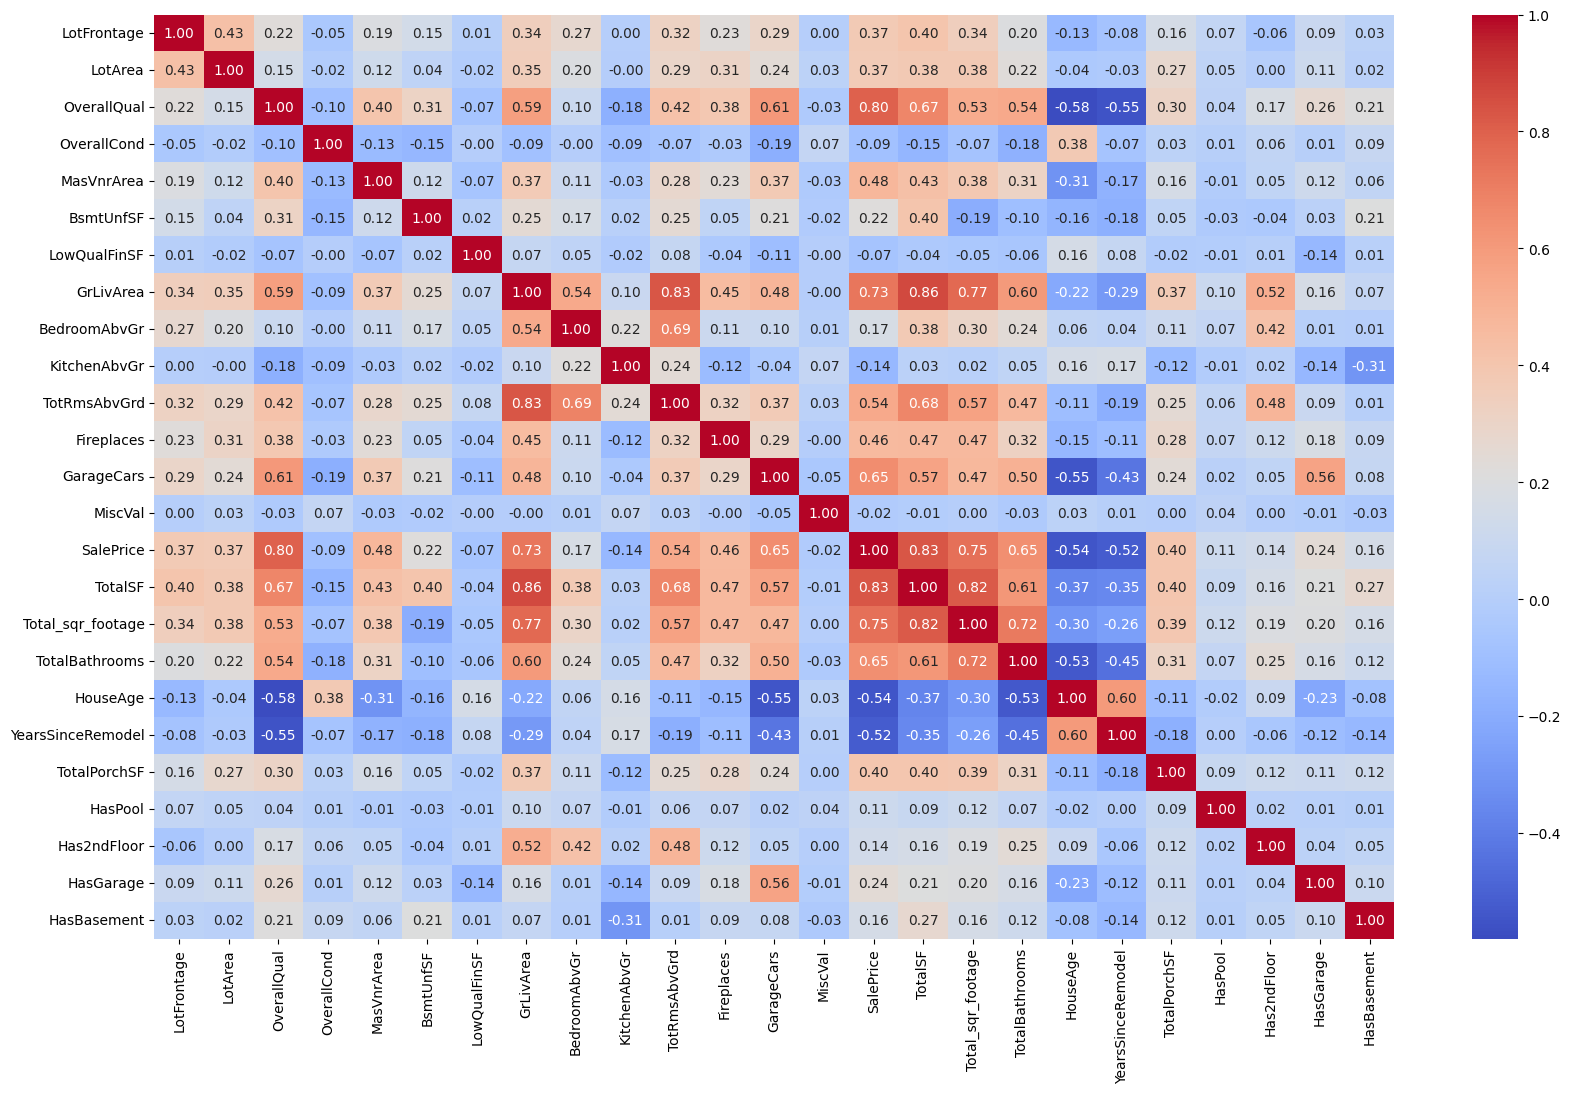

In [77]:
correlation_matrix = train_df.corr(numeric_only=True)
plt.figure(figsize=(20,12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# 7. Log Transformation of Sale Price

<Axes: xlabel='SalePrice', ylabel='Count'>

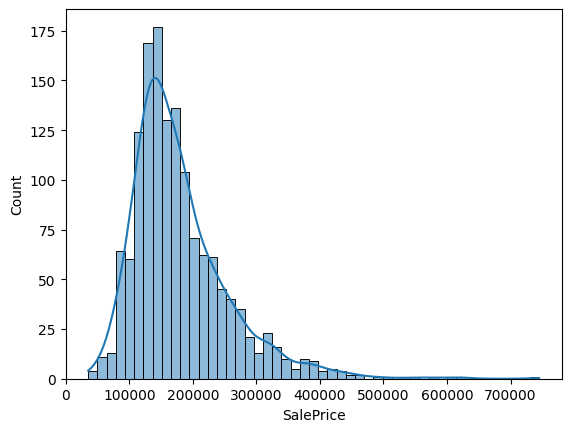

In [78]:
sns.histplot(train_df['SalePrice'], kde=True)

In [79]:
train_df['SalePrice'].skew()

np.float64(1.7235643898696793)

In [80]:
train_df['SalePrice'] = np.log1p(train_df['SalePrice'])

<Axes: xlabel='SalePrice', ylabel='Count'>

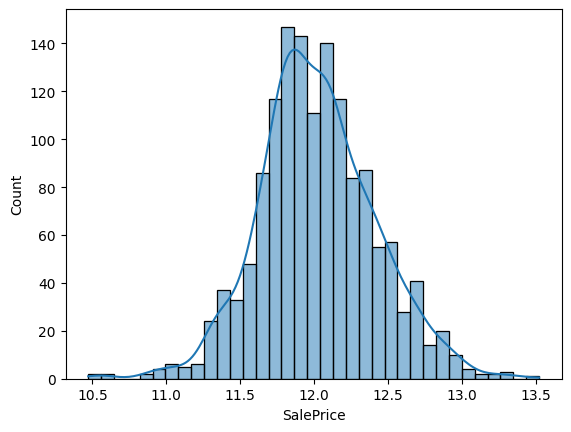

In [81]:
sns.histplot(train_df['SalePrice'], kde=True)

In [82]:
train_df['SalePrice'].skew()

np.float64(0.11398677709096665)

# 8. Numerical and Categorial features


In [83]:
num_cols = train_df.select_dtypes(include=[np.number]).columns
cat_cols = train_df.select_dtypes(include=['object']).columns
num_cols =num_cols.drop('SalePrice')  

print(f'Number of numerical features: {len(num_cols)}')
print(num_cols)
print(f'Number of categorical features: {len(cat_cols)}')
print(cat_cols)

Number of numerical features: 24
Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtUnfSF', 'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MiscVal',
       'TotalSF', 'Total_sqr_footage', 'TotalBathrooms', 'HouseAge',
       'YearsSinceRemodel', 'TotalPorchSF', 'HasPool', 'Has2ndFloor',
       'HasGarage', 'HasBasement'],
      dtype='object')
Number of categorical features: 41
Index(['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', '

# 9. Preparing the data for training

In [84]:
X_train= train_df.drop(columns=['SalePrice'])
y_train= train_df['SalePrice']

In [126]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder,RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score, KFold,GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from lightgbm import LGBMRegressor
from sklearn.ensemble import StackingRegressor
import xgboost as xgb


In [108]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

In [109]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)

In [110]:
lr_model = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])
lr_cv_scores = cross_val_score(lr_model, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')
print(f'Linear Regression CV RMSE: {-lr_cv_scores.mean():.4f} ± {lr_cv_scores.std():.4f}')

Linear Regression CV RMSE: 0.1222 ± 0.0200


In [111]:
ridge_model = Pipeline([
    ('preprocessor', preprocessor),
    ('model', Ridge(alpha=10, random_state=42))
])

ridge_cv_scores = cross_val_score(ridge_model, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')

print(f'Ridge CV RMSE: {-ridge_cv_scores.mean():.4f} ± {ridge_cv_scores.std():.4f}')

Ridge CV RMSE: 0.1092 ± 0.0177


In [119]:
lasso_model = Pipeline([
    ('preprocessor', preprocessor),
    ('model', Lasso(alpha=0.001, random_state=42))
])

lasso_cv_scores = cross_val_score(lasso_model, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')

print(f'Lasso CV RMSE: {-lasso_cv_scores.mean():.4f} ± {lasso_cv_scores.std():.4f}')

Lasso CV RMSE: 0.1098 ± 0.0166


In [ ]:
elasticnet_model = Pipeline([
    ('preprocessor', preprocessor),
    ('model', ElasticNet(alpha=0.001, l1_ratio=0.5, random_state=42))
])

elasticnet_cv_scores = cross_val_score(
    elasticnet_model, 
    X_train, 
    y_train, 
    cv=kf, 
    scoring='neg_root_mean_squared_error',
)

print(f'ElasticNet CV RMSE: {-elasticnet_cv_scores.mean():.4f} ± {elasticnet_cv_scores.std():.4f}')

ElasticNet CV RMSE: 0.1081 ± 0.0165


In [125]:
lightgbm = LGBMRegressor(
    objective='regression', 
    num_leaves=4, 
    learning_rate=0.01, 
    n_estimators=9000, 
    max_bin=200, 
    bagging_fraction=0.75,
    bagging_freq=5, 
    bagging_seed=7,
    feature_fraction=0.2, 
    feature_fraction_seed=7,
    verbose=-1,
    random_state=42 
)

lgbm_model = Pipeline([
    ('preprocessor', preprocessor),
    ('model', lightgbm)
])

lgbm_cv_scores = cross_val_score(
    lgbm_model, 
    X_train, 
    y_train, 
    cv=kf, 
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

print(f'LightGBM CV RMSE: {-lgbm_cv_scores.mean():.4f} ± {lgbm_cv_scores.std():.4f}')

LightGBM CV RMSE: 0.1122 ± 0.0166


In [127]:
xgboost = xgb.XGBRegressor(
    learning_rate=0.01, 
    n_estimators=3400, 
    max_depth=3,
    min_child_weight=0, 
    gamma=0, 
    subsample=0.7,
    colsample_bytree=0.7,
    objective='reg:squarederror',
    nthread=4,
    scale_pos_weight=1,
    seed=27, 
    reg_alpha=0.00006
)

xgb_model = Pipeline([
    ('preprocessor', preprocessor),
    ('model', xgboost)
])

xgb_cv_scores = cross_val_score(
    xgb_model, 
    X_train, 
    y_train, 
    cv=kf, 
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

print(f'XGBoost CV RMSE: {-xgb_cv_scores.mean():.4f} ± {xgb_cv_scores.std():.4f}')

XGBoost CV RMSE: 0.1104 ± 0.0163
